# Loan Prediction Problem 

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset

data = pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Project 8-9-10/loan_prediction.csv")

In [3]:
# check the first five sample data

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# check the information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
# check the missing values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Treat the missing values

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(0,inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [7]:
# Since feature loan_Id is not of use, we cna drop this column

data = data.drop(labels='Loan_ID',axis=1)

In [8]:
# Statistical Analysis

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


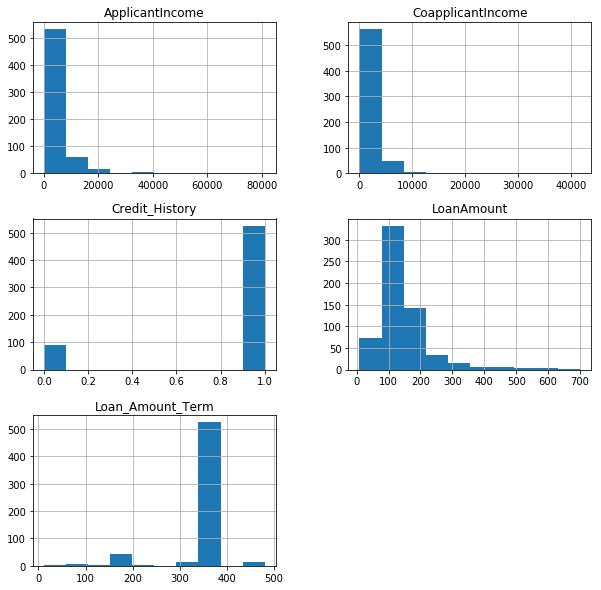

In [9]:
# Univariate Analysis

data.hist(figsize=(10,10))
plt.show()

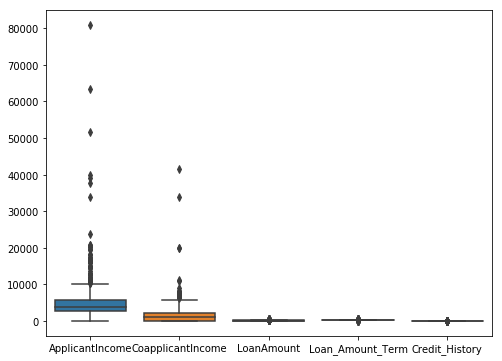

In [10]:
# check the outliers

plt.figure(figsize=(8,6))
sns.boxplot(data=data)

#### It may look like that there are outliers in the feature ApplicantIncome and CoapplicantIncome, but we are not treating them as most of the values are outliers in these both features

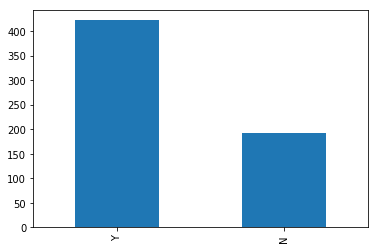

In [11]:
# Plotting the graph of Loan Status

data['Loan_Status'].value_counts().plot.bar()

In [12]:
# converting the target feature into numerical variable

from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

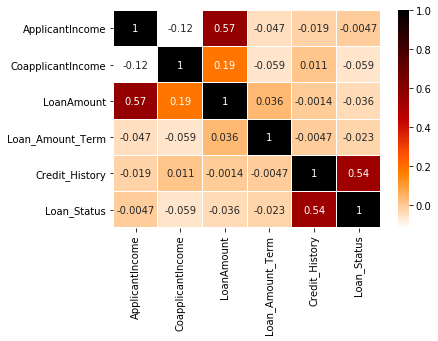

In [13]:
#checking the correlation betwen numerical features

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='gist_heat_r',annot=True,linewidths=0.1)

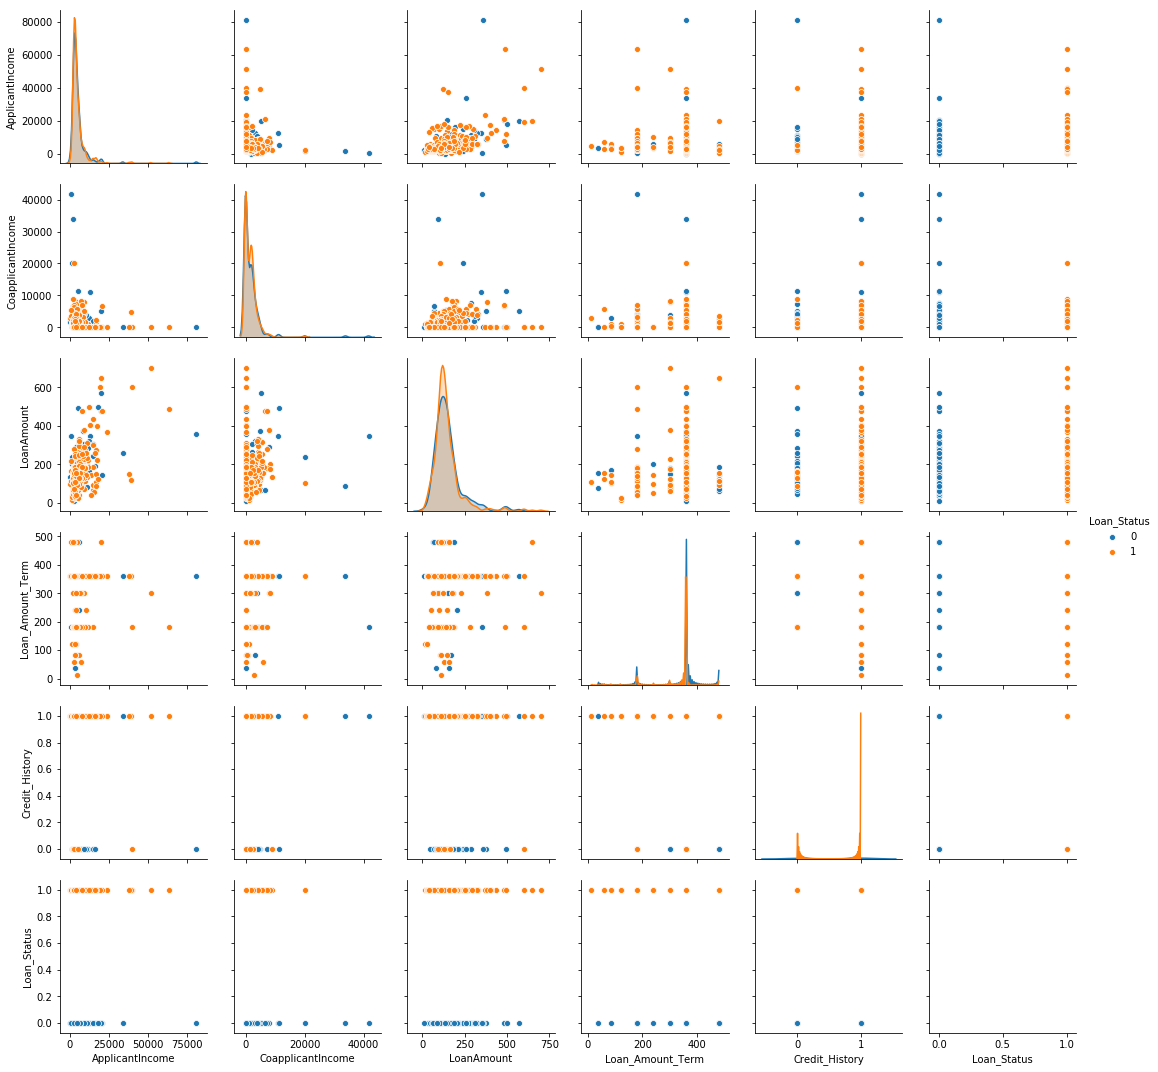

In [14]:
#Bivariate Analysis

sns.pairplot(data,hue='Loan_Status')

In [15]:
#convert the categorical variables to numerical

pd.set_option('display.max_columns',22)
final_data = pd.get_dummies(data)
final_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1


In [16]:
# segregating the features and target variable

y = final_data['Loan_Status']
X = final_data.drop(labels='Loan_Status',axis=1)

In [17]:
# segregating the train and test set

from sklearn.model_selection import train_test_split,KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

## Implementing all the models

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [19]:
# appending all the models in a list

models = []
results = []
names = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=22)))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=22, p=2,
             weights='uniform')),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('RFC',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              m

In [20]:
# Fitting all the models on the training set

for name,model in models:
    k_fold = KFold(n_splits=10,random_state=42)
    cv_score = cross_val_score(model,train_X,y=train_y,scoring='accuracy',cv=k_fold)
    results.append(cv_score)
    names.append(name)
    print('%s %.2f (%.2f)' % (name,(cv_score.mean()*100),(cv_score.std()*100)))

LR 77.84 (5.76)
KNN 67.37 (5.99)
DT 66.16 (5.14)
NB 76.14 (7.18)
RFC 73.48 (6.02)
SVM 68.59 (6.20)


In [21]:
#Since Logistic Regression is the best fitted model

lr = LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
lr_predicted = lr.predict(test_X)
lr_predicted

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0])

In [23]:
#checking the accuracy of the model on the test data

lr_score = accuracy_score(test_y,lr_predicted)
print('Accuracy of the model : %.2f' % (lr_score*100))

print('Classifiction report :')
print(classification_report(test_y,lr_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,lr_predicted))

Accuracy of the model : 84.73
Classifiction report :
              precision    recall  f1-score   support

           0       0.92      0.56      0.69        63
           1       0.83      0.98      0.90       140

   micro avg       0.85      0.85      0.85       203
   macro avg       0.88      0.77      0.80       203
weighted avg       0.86      0.85      0.83       203

confusion matrix :
[[ 35  28]
 [  3 137]]
